## Environment setup

In [1]:
!nvidia-smi

Fri Apr 11 02:21:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 60.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!wget https://media.roboflow.com/notebooks/examples/dog.jpeg

--2025-04-11 02:23:52--  https://media.roboflow.com/notebooks/examples/dog.jpeg
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106055 (104K) [image/jpeg]
Saving to: ‘dog.jpeg’

dog.jpeg            100%[===================>] 103.57K  --.-KB/s    in 0.001s  

2025-04-11 02:23:52 (136 MB/s) - ‘dog.jpeg’ saved [106055/106055]



# 新段落

## Run inference

In the example, we're using the `yolov12l.pt` model, but you can experiment with different model sizes by simply swapping out the model name during initialization. Options include `yolov12n.pt`, `yolov12s.pt`, `yolov12m.pt`, `yolov12l.pt`, and `yolov12x.pt`.

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


100%|██████████| 51.4M/51.4M [00:01<00:00, 52.6MB/s]


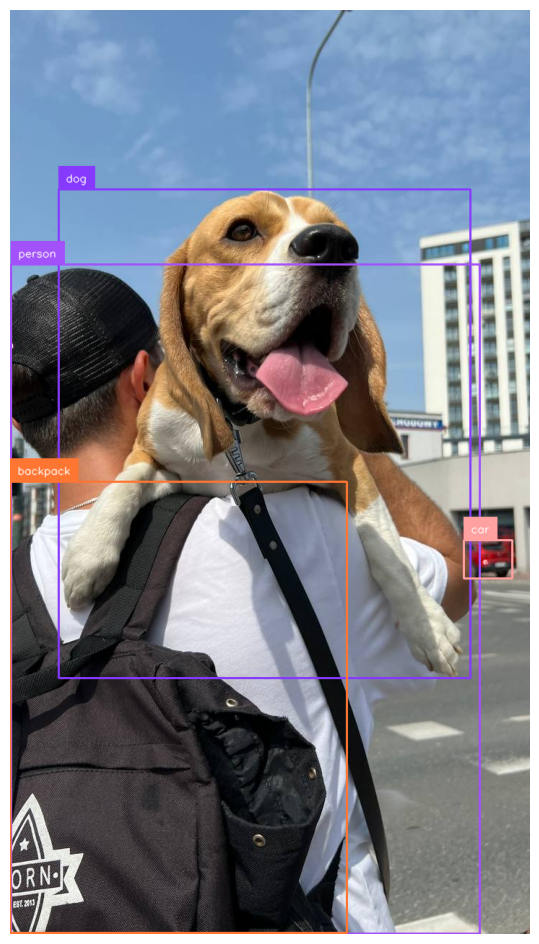

In [5]:
import cv2
from ultralytics import YOLO
import supervision as sv


image_path = f"{HOME}/dog.jpeg"
image = cv2.imread(image_path)

model = YOLO('yolov12l.pt')

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

## Download dataset from Roboflow Universe

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JJAXaxqVuqQageoKH9qA")
project = rf.workspace("clgd-w9hpr").project("maize-5ydqa")
version = project.version(1)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to maize-1 in yolov12:: 100%|██████████| 1398/1398 [00:00<00:00, 2384.80it/s]


In [7]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=250)

New https://pypi.org/project/ultralytics/8.3.107 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/maize-1/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

100%|██████████| 755k/755k [00:00<00:00, 17.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2, 1, 2]          
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2, 1, 4]        
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    677120  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.26M/5.26M [00:00<00:00, 81.2MB/s]


AMP: checks passed ✅


train: Scanning /content/maize-1/train/labels... 603 images, 0 backgrounds, 0 corrupt: 100%|██████████| 603/603 [00:00<00:00, 2279.46it/s]

train: New cache created: /content/maize-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/maize-1/valid/labels... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<00:00, 2054.99it/s]

val: New cache created: /content/maize-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250       6.7G      5.241      7.094      4.123         18        640: 100%|██████████| 38/38 [00:22<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all         54        104   6.17e-05    0.00962    3.2e-05   1.28e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      6.66G      4.247       5.34      3.481         16        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         54        104   6.17e-05    0.00962    3.2e-05   1.28e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      6.65G      3.509      4.403        2.9         19        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         54        104   6.17e-05    0.00962    3.2e-05   1.28e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.83G        3.3      3.888      2.651         25        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         54        104     0.0033      0.481    0.00899    0.00143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      6.64G      3.219      3.687      2.572         25        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         54        104     0.0653     0.0192    0.00218   0.000677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      6.82G      3.176      3.506      2.469         24        640: 100%|██████████| 38/38 [00:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         54        104    0.00092     0.0769   0.000501    0.00023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      6.81G      3.088      3.436      2.429         27        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         54        104     0.0406     0.0481     0.0129    0.00392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      6.65G      3.036       3.47      2.311         28        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         54        104     0.0204     0.0481    0.00489    0.00138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      6.82G      3.005      3.348      2.366         31        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         54        104    0.00964      0.308     0.0185    0.00527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      6.82G      2.982      3.318       2.33         26        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104     0.0674     0.0962     0.0234    0.00549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      6.84G      2.891      3.302      2.276         26        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104     0.0838     0.0769     0.0186    0.00475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      6.66G      2.904      3.252      2.231         26        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         54        104    0.00719      0.269    0.00899    0.00215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      6.81G      2.904      3.269      2.246         23        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         54        104      0.171    0.00962    0.00829    0.00203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      6.82G      2.858      3.212       2.18         22        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104    0.00661      0.567     0.0351    0.00925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      6.84G      2.785      3.177      2.157         47        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         54        104      0.111     0.0769     0.0473     0.0127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      6.64G      2.814      3.144      2.142         19        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104     0.0929     0.0798     0.0313    0.00815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      6.81G      2.847      3.164      2.153         42        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         54        104     0.0751      0.154     0.0313    0.00934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      6.82G      2.729      3.148      2.107         21        640: 100%|██████████| 38/38 [00:20<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.102     0.0769     0.0377     0.0118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.81G      2.712      3.127      2.113         20        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         54        104      0.147     0.0579     0.0431       0.01



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      6.82G      2.697      3.065      2.064         24        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         54        104     0.0969     0.0962       0.05     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      6.82G      2.697      3.062      2.064         16        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104     0.0824      0.163     0.0429     0.0138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      6.82G      2.702      3.043      2.062         22        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         54        104     0.0138      0.375      0.025    0.00644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.65G      2.691      3.062       2.09         28        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         54        104     0.0806      0.135     0.0307    0.00828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      6.65G      2.662      3.077      2.065         29        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         54        104      0.121     0.0673     0.0296    0.00828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      6.65G      2.607      3.046      2.028         29        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104     0.0789     0.0769     0.0348     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      6.81G      2.624      2.975      2.017         29        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104     0.0979      0.125       0.03    0.00696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.65G      2.607      2.943      2.024         19        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         54        104     0.0577     0.0865     0.0254    0.00809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      6.66G      2.539      2.945      1.967         31        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104     0.0974     0.0865     0.0366     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      6.81G      2.555      2.941       2.01         21        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         54        104     0.0903      0.125     0.0428     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      6.82G      2.587      2.949      1.974         19        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         54        104     0.0675     0.0769     0.0229    0.00609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      6.81G      2.559      2.901      1.988         19        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         54        104     0.0931      0.163     0.0484      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      6.82G      2.534      2.866      1.969         34        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104     0.0897      0.115     0.0454     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      6.82G      2.529      2.839       1.95         33        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.122      0.144     0.0539     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      6.82G      2.601      2.959      2.004         27        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104      0.126     0.0819     0.0426     0.0128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      6.81G      2.512      2.929      2.003         31        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         54        104      0.143      0.106     0.0515     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      6.82G      2.455      2.853      1.923         28        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         54        104      0.111      0.173     0.0468     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      6.67G      2.457       2.87      1.954         29        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         54        104      0.144      0.135     0.0674     0.0243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      6.81G      2.481      2.874      1.952         22        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104     0.0798      0.163     0.0447     0.0113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      6.82G      2.445       2.79      1.913         20        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         54        104      0.115      0.111      0.055     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      6.82G       2.46      2.842      1.912         15        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         54        104      0.134      0.173     0.0713     0.0212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      6.81G       2.46      2.843      1.935         22        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         54        104     0.0827      0.173     0.0464      0.015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      6.82G      2.463      2.798       1.93         33        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104      0.125      0.173     0.0653     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      6.82G      2.374      2.732      1.884         14        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         54        104      0.147      0.183     0.0704     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.65G      2.465      2.823      1.955         26        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         54        104      0.172      0.231      0.084     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      6.82G      2.438      2.771      1.898         23        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         54        104     0.0745     0.0769     0.0448     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      6.65G      2.419      2.747      1.868         34        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104     0.0967      0.125     0.0563     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.82G      2.352      2.687      1.825         15        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         54        104      0.131      0.135     0.0711     0.0221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      6.65G      2.337      2.717      1.831         23        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.141      0.192     0.0803     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      6.84G      2.347      2.654      1.849         43        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         54        104       0.17      0.183     0.0786     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      6.83G      2.326      2.592      1.815         24        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         54        104      0.162      0.144     0.0656     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      6.81G      2.299       2.63      1.852         29        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         54        104      0.155      0.173     0.0712     0.0215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.83G      2.383       2.68      1.865         36        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104      0.161      0.173     0.0945     0.0258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      6.81G       2.36      2.598      1.818         37        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         54        104      0.146      0.135     0.0732     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      6.82G      2.324        2.6      1.835         38        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         54        104      0.156      0.192     0.0845     0.0258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      6.82G      2.325      2.656      1.832         23        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         54        104      0.165      0.212     0.0806     0.0258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      6.65G       2.34      2.715      1.859         35        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.183      0.144     0.0852     0.0219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      6.82G      2.296      2.592      1.829         25        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104      0.145      0.183     0.0704     0.0212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      6.66G      2.316      2.555      1.806         41        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.165      0.154      0.087     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      6.82G       2.28      2.579      1.791         26        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         54        104      0.124      0.192     0.0792     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.64G      2.286       2.55      1.851         27        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         54        104      0.124      0.202     0.0754     0.0217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      6.84G       2.25      2.539      1.777         24        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.165      0.212     0.0993     0.0244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      6.83G       2.24      2.498       1.77         45        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.122      0.154     0.0796     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      6.81G      2.266       2.53      1.815         37        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         54        104       0.15      0.221     0.0993     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      6.65G       2.26      2.501      1.821         25        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.165      0.231      0.101     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      6.82G      2.258      2.522      1.758         20        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.118      0.163     0.0892     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      6.83G      2.219      2.422      1.746         39        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.196       0.24      0.102     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      6.82G      2.201      2.468       1.76         22        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         54        104      0.225      0.212       0.13     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      6.83G      2.193      2.469       1.77         22        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         54        104      0.161      0.163      0.116     0.0425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      6.84G      2.213      2.412      1.794         26        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104       0.22      0.221      0.114     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      6.65G      2.151      2.421      1.763         35        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104       0.18       0.26       0.13     0.0355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      6.81G      2.172      2.349      1.738         35        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         54        104      0.164       0.25      0.094     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      6.82G       2.18      2.383      1.738         26        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.194      0.174      0.126     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      6.65G      2.141      2.312      1.691         30        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         54        104      0.186      0.212      0.121     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      6.82G      2.169      2.344      1.732         33        640: 100%|██████████| 38/38 [00:20<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.196       0.25       0.11     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      6.67G      2.112      2.281      1.708         25        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         54        104       0.23       0.24      0.153     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      6.83G      2.168      2.327      1.731         32        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.134      0.202     0.0958     0.0258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      6.81G      2.159      2.328      1.712         36        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.231      0.173      0.142      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      6.81G      2.122      2.327      1.755         35        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.165      0.298      0.118     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      6.82G      2.115      2.303       1.71         15        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         54        104       0.22      0.282      0.157     0.0458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      6.83G      2.117      2.329       1.71         25        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         54        104      0.277      0.288      0.181     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      6.82G      2.112      2.257      1.706         27        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.203       0.24      0.145     0.0493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      6.82G      2.138       2.31      1.699         22        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104       0.15       0.24     0.0981     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      6.65G      2.078      2.207       1.69         31        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         54        104      0.194      0.192      0.125     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      6.82G      2.072      2.256      1.691         28        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.179      0.303       0.12     0.0381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      6.84G       2.07      2.208      1.698         29        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.195      0.192       0.11     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.66G      2.054      2.184      1.657         35        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.233      0.212      0.147     0.0469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      6.81G      2.039      2.198      1.682         34        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         54        104      0.169      0.271       0.14     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      6.83G      2.109       2.21      1.683         22        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.191       0.24      0.126     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      6.82G      2.043      2.145      1.661         25        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         54        104      0.182      0.235      0.113     0.0337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      6.68G      2.039       2.14      1.666         37        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104       0.22       0.26      0.142     0.0407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      6.82G      2.015      2.125      1.668         28        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         54        104      0.219      0.317      0.141     0.0475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      6.82G       2.02       2.06      1.629         35        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         54        104      0.197       0.25      0.143     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      6.65G      1.989      2.116      1.654         23        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         54        104      0.196      0.173     0.0947     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      6.66G      2.021      2.146      1.647         23        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         54        104      0.181      0.202      0.145     0.0532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      6.81G       2.02      2.101      1.625         27        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         54        104      0.212      0.183      0.127     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      6.84G      2.008      2.088      1.625         30        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         54        104      0.237      0.298      0.162     0.0565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      6.83G      2.024       2.11      1.643         24        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         54        104       0.13      0.269      0.092     0.0337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      6.83G       1.99      2.057       1.63         24        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         54        104      0.221      0.269      0.186     0.0601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      6.81G      1.985      2.012      1.638         24        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         54        104      0.183      0.288      0.154     0.0508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      6.81G      1.967        2.1      1.611         23        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.222       0.24      0.154     0.0542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      6.81G      1.952      1.995      1.588         26        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.175      0.327      0.164     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      6.83G      1.959      1.971       1.59         34        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104      0.283       0.26      0.156     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      6.65G       1.97      1.985      1.584         23        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.292       0.25      0.185     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.64G      1.973       1.98      1.608         34        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.227       0.24      0.135     0.0509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      6.81G      1.987      2.024      1.636         26        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.189      0.385       0.18     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      6.67G      1.974      2.003      1.604         28        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         54        104      0.187       0.25      0.122      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      6.83G      1.995      2.007      1.651         29        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.207      0.279      0.162     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      6.83G      1.955      1.967      1.611         25        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         54        104      0.163      0.273      0.142     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      6.82G      1.909      1.904      1.581         25        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104       0.26      0.346      0.189     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      6.82G      1.898      1.973      1.595         23        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         54        104      0.253      0.365      0.194      0.064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.82G      1.905      1.868      1.568         28        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.241      0.356      0.165     0.0568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      6.81G      1.851      1.871      1.583         37        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.245      0.288      0.155     0.0482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      6.82G      1.886        1.9       1.56         23        640: 100%|██████████| 38/38 [00:20<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.216      0.346      0.172     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      6.83G      1.904      1.909       1.56         32        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         54        104      0.246      0.279      0.161     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      6.82G      1.869      1.876      1.552         40        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.297      0.337      0.198      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.83G      1.813      1.783      1.519         26        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         54        104      0.213      0.298      0.183     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      6.82G      1.819      1.791      1.511         32        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.269      0.327      0.209     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      6.83G      1.856      1.806      1.545         24        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         54        104      0.223      0.308      0.164     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      6.82G      1.858      1.815      1.516         18        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         54        104      0.285      0.288      0.185     0.0639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      6.83G      1.845      1.776      1.528         35        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.303      0.327      0.194     0.0735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      6.82G       1.89      1.828      1.578         25        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104       0.22      0.346      0.146     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      6.83G      1.931      1.883      1.593         31        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         54        104      0.256      0.357       0.19     0.0668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      6.82G      1.868      1.801      1.532         25        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104      0.304      0.346      0.222     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      6.83G      1.864      1.844      1.557         25        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.276      0.327      0.188     0.0702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      6.84G      1.832      1.789      1.528         39        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104       0.26      0.231      0.173     0.0668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      6.83G       1.75      1.691       1.52         28        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         54        104      0.266      0.317      0.211     0.0883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      6.82G       1.84      1.781      1.526         21        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.219      0.321      0.187     0.0666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      6.83G      1.834      1.784      1.549         25        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         54        104      0.274      0.269      0.179     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      6.82G       1.87      1.779      1.554         38        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         54        104      0.297       0.25       0.19     0.0771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      6.83G        1.8      1.709      1.513         36        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         54        104      0.299      0.308       0.18     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.82G       1.82      1.722       1.52         32        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         54        104       0.25      0.423      0.212     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      6.83G      1.761      1.682      1.498         20        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         54        104      0.331      0.337      0.214     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      6.82G      1.783      1.701      1.512         33        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104      0.291      0.351      0.214     0.0788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      6.83G      1.812      1.761      1.502         27        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         54        104      0.284      0.298      0.209     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      6.82G      1.751      1.658      1.495         33        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         54        104      0.392      0.337      0.217     0.0727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      6.83G      1.775      1.709      1.504         30        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         54        104      0.232      0.356      0.184     0.0661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      6.82G      1.727      1.676      1.486         23        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104       0.31      0.308      0.215     0.0846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      6.83G       1.76      1.697      1.499         24        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         54        104      0.293      0.298      0.205     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      6.82G      1.747       1.64      1.475         27        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         54        104      0.312      0.385      0.226     0.0852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      6.85G      1.743      1.622      1.469         22        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104      0.288      0.337      0.254      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      6.82G      1.702      1.613      1.487         37        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.298      0.337      0.224     0.0996



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      6.83G      1.705      1.588      1.439         35        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         54        104      0.335      0.279      0.216        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      6.82G      1.713      1.608      1.465         22        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.261      0.404      0.228     0.0941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      6.83G      1.754      1.577       1.47         32        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         54        104      0.273       0.25      0.167     0.0667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      6.84G      1.711      1.588      1.471         37        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.332      0.346      0.268       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      6.65G      1.729      1.587      1.466         25        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         54        104      0.267       0.35      0.242      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      6.81G      1.695      1.568      1.456         21        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.411      0.308      0.261      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      6.82G      1.731      1.597      1.478         17        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         54        104       0.35      0.308      0.228      0.085



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      6.65G      1.653      1.541      1.446         29        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.373      0.337      0.283      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      6.82G      1.665      1.514      1.436         22        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         54        104      0.279      0.375       0.28       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      6.67G      1.638      1.488      1.429         27        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.295      0.413      0.271      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.81G      1.631      1.489      1.391         33        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104       0.31      0.394       0.26      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      6.81G      1.663      1.547      1.469         22        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.277      0.375      0.274       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      6.81G      1.638      1.503      1.445         33        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         54        104      0.314      0.337      0.281      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      6.82G        1.6      1.448      1.401         22        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.397      0.317       0.29      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      6.83G      1.677      1.498      1.439         26        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         54        104      0.292      0.385      0.252      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      6.82G      1.659      1.475       1.43         33        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         54        104      0.444      0.269      0.319      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.82G      1.642      1.484      1.408         31        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         54        104       0.32      0.317      0.286       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.65G      1.603      1.434        1.4         25        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         54        104      0.352      0.375      0.267      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      6.85G      1.661      1.517      1.435         28        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.364      0.327      0.277      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      6.82G      1.656      1.508      1.455         29        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.403      0.288      0.261      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      6.82G      1.612      1.462      1.406         30        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         54        104      0.412      0.308      0.323      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.65G      1.664      1.523      1.442         22        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.347      0.356      0.307      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      6.82G      1.629      1.502      1.402         32        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.465      0.308      0.297      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      6.65G      1.609      1.469        1.4         36        640: 100%|██████████| 38/38 [00:20<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.481      0.346       0.33      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      6.83G      1.586      1.447      1.379         22        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         54        104      0.386      0.279      0.273      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      6.82G      1.612      1.446      1.402         23        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         54        104      0.397      0.365      0.325       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      6.83G      1.586      1.459      1.405         37        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104      0.323      0.365      0.299      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      6.82G      1.589        1.4      1.378         29        640: 100%|██████████| 38/38 [00:20<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.317      0.356      0.285      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      6.83G       1.59      1.421      1.391         35        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         54        104      0.411      0.346       0.34      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      6.84G      1.594      1.417      1.387         28        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.439      0.317      0.326      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      6.65G      1.621      1.425      1.381         33        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.353      0.375      0.312      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      6.81G       1.58      1.426       1.42         23        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.349      0.385      0.318      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      6.82G      1.562      1.379      1.376         31        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         54        104      0.441      0.279      0.324      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      6.65G      1.583        1.4      1.423         39        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         54        104      0.419      0.339      0.346      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      6.82G      1.591      1.388      1.387         19        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.326      0.481      0.326       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      6.65G      1.554      1.379      1.384         39        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.365      0.353      0.293      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      6.64G      1.529      1.309      1.346         31        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         54        104      0.536       0.26      0.329      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      6.81G      1.522       1.32      1.362         23        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.426      0.346      0.352      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      6.82G      1.529      1.352      1.357         22        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.466      0.308       0.33      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      6.81G      1.571       1.41       1.42         37        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.395      0.365      0.314      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      6.82G      1.527      1.352      1.368         24        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         54        104      0.414      0.356      0.353      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      6.82G      1.548      1.354      1.378         30        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.572      0.308      0.355      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250       6.8G      1.521      1.333       1.36         23        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.384      0.452      0.377      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      6.82G      1.487      1.293      1.334         15        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         54        104      0.433      0.346      0.325      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      6.84G      1.508      1.274      1.346         30        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         54        104      0.416      0.394      0.362      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      6.65G      1.525      1.313      1.345         35        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.544      0.269       0.32      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      6.64G       1.49      1.314       1.34         25        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         54        104      0.424      0.404      0.356      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      6.81G      1.473      1.259      1.326         30        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         54        104      0.491      0.327      0.358      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      6.82G      1.486      1.263      1.344         30        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.491      0.346      0.357      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250      6.82G       1.46      1.231      1.332         28        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         54        104      0.466      0.433       0.37       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      6.83G      1.525      1.308      1.336         22        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.485      0.371      0.378       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      6.82G       1.47      1.254      1.324         25        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         54        104       0.46      0.365      0.361      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      6.85G      1.527       1.34      1.373         31        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        104      0.403      0.346      0.346      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      6.82G      1.489      1.283      1.346         30        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.425      0.391      0.382      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      6.83G      1.466      1.257      1.331         31        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.454      0.337      0.355      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      6.82G      1.477      1.212      1.327         19        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         54        104      0.385      0.385      0.361      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      6.85G      1.462      1.242      1.322         28        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         54        104      0.489      0.327      0.356      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      6.82G      1.507      1.276      1.357         22        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         54        104      0.409      0.413      0.385      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      6.83G      1.459      1.235      1.328         36        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.444      0.327      0.327      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      6.82G       1.44      1.217      1.323         19        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         54        104      0.381      0.452      0.377      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      6.83G      1.459      1.223      1.336         15        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         54        104      0.565      0.308      0.386      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      6.82G      1.465       1.22      1.337         20        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         54        104       0.46      0.413      0.417      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      6.83G      1.445      1.209      1.308         26        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.639      0.289      0.399      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      6.82G       1.44      1.208      1.327         25        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         54        104      0.557      0.298      0.389      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      6.83G      1.429      1.185      1.312         32        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         54        104       0.57      0.327       0.37      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      6.82G      1.414      1.187      1.306         36        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.683      0.308      0.376      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      6.83G      1.408      1.176      1.306         29        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.449        0.4      0.376      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      6.82G      1.442      1.214      1.308         34        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         54        104      0.659      0.334      0.397      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      6.83G      1.381      1.146      1.268         36        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.481      0.317      0.385      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      6.82G      1.402      1.184      1.285         27        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.445      0.394      0.372      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      6.83G      1.384      1.171      1.273         26        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         54        104      0.533      0.383      0.433      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      6.82G      1.403      1.197       1.29         29        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.372      0.385      0.394      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      6.83G      1.398      1.183       1.28         27        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         54        104      0.541      0.365      0.392      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      6.82G      1.358      1.149      1.287         34        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         54        104      0.594      0.337      0.418      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      6.83G      1.405      1.151      1.291         28        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         54        104      0.665      0.375      0.452      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      6.82G      1.381      1.124      1.294         25        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.513      0.455      0.424      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      6.83G      1.374      1.126      1.277         24        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         54        104      0.504      0.394      0.399      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250      6.82G      1.398      1.164        1.3         32        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.491      0.365      0.401      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      6.83G      1.408       1.15      1.287         27        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         54        104      0.552      0.355      0.407      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      6.82G      1.405      1.167      1.296         30        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         54        104       0.48      0.423      0.412      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250      6.83G       1.37      1.138      1.264         27        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.621      0.308      0.422       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250      6.82G      1.372      1.145      1.277         42        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.584      0.394      0.429      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      6.83G      1.388      1.176      1.274         31        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         54        104      0.516      0.451      0.438      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250      6.81G      1.366      1.147      1.283         33        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         54        104      0.656      0.348      0.432      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250      6.83G       1.35      1.143      1.274         41        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.637      0.346      0.429      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250      6.82G       1.37      1.117      1.266         23        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         54        104      0.651      0.376      0.437      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      6.85G      1.329      1.093      1.249         35        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         54        104      0.417      0.462      0.419      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250      6.82G      1.333      1.098      1.263         27        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         54        104      0.506      0.404      0.409      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      6.83G      1.326      1.096      1.253         37        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         54        104      0.546      0.375      0.421      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250      6.84G      1.348      1.103      1.255         30        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         54        104      0.458      0.462      0.447      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250      6.65G      1.327      1.095      1.276         22        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.582      0.404      0.455      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      6.81G      1.303      1.077      1.252         26        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         54        104      0.636      0.385      0.462      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250      6.82G        1.3      1.064      1.225         42        640: 100%|██████████| 38/38 [00:20<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         54        104      0.589      0.394       0.43      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250      6.65G      1.314      1.101       1.25         28        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         54        104      0.535      0.394       0.44      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      6.82G      1.326        1.1      1.281         39        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104       0.67      0.352      0.456       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250      6.65G      1.318      1.082      1.245         32        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         54        104      0.602      0.375      0.452      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      6.64G      1.309      1.082      1.239         33        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54        104      0.505      0.423      0.442      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250      6.81G       1.28      1.054       1.23         14        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.564      0.394      0.431      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      6.64G      1.316      1.066      1.252         30        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         54        104      0.592      0.404      0.441       0.25


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250      6.81G      1.434       1.22      1.372         20        640: 100%|██████████| 38/38 [00:21<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.509      0.459      0.447      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250       6.8G      1.377      1.182      1.362         23        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         54        104      0.476      0.481      0.453      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250      6.82G      1.288      1.054      1.306         15        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         54        104      0.502      0.413      0.428      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250      6.82G      1.297      1.073      1.327         12        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.473      0.404      0.425      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250      6.82G      1.301       1.07      1.327         16        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         54        104      0.519      0.356      0.426      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250      6.81G      1.256       1.06      1.282         14        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         54        104      0.663      0.337      0.428      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250      6.81G      1.258      1.056      1.306         13        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        104      0.538      0.385       0.43      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250      6.83G      1.256      1.037      1.296         13        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         54        104      0.496      0.394      0.422      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      6.82G      1.249      1.044      1.287         16        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         54        104      0.511      0.413      0.415      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      6.83G      1.279       1.05      1.297         19        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         54        104      0.493      0.423      0.423      0.231



250 epochs completed in 1.520 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,074,595 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]


                   all         54        104      0.645      0.394      0.463      0.251
Speed: 0.2ms preprocess, 9.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


## Evaluate fine-tuned YOLOv12 model

In [17]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml					   train_batch0.jpg
confusion_matrix_normalized.png			   train_batch1.jpg
confusion_matrix.png				   train_batch2.jpg
events.out.tfevents.1744338274.dd31760338ea.798.0  train_batch9120.jpg
F1_curve.png					   train_batch9121.jpg
labels_correlogram.jpg				   train_batch9122.jpg
labels.jpg					   val_batch0_labels.jpg
P_curve.png					   val_batch0_pred.jpg
PR_curve.png					   val_batch1_labels.jpg
R_curve.png					   val_batch1_pred.jpg
results.csv					   weights
results.png


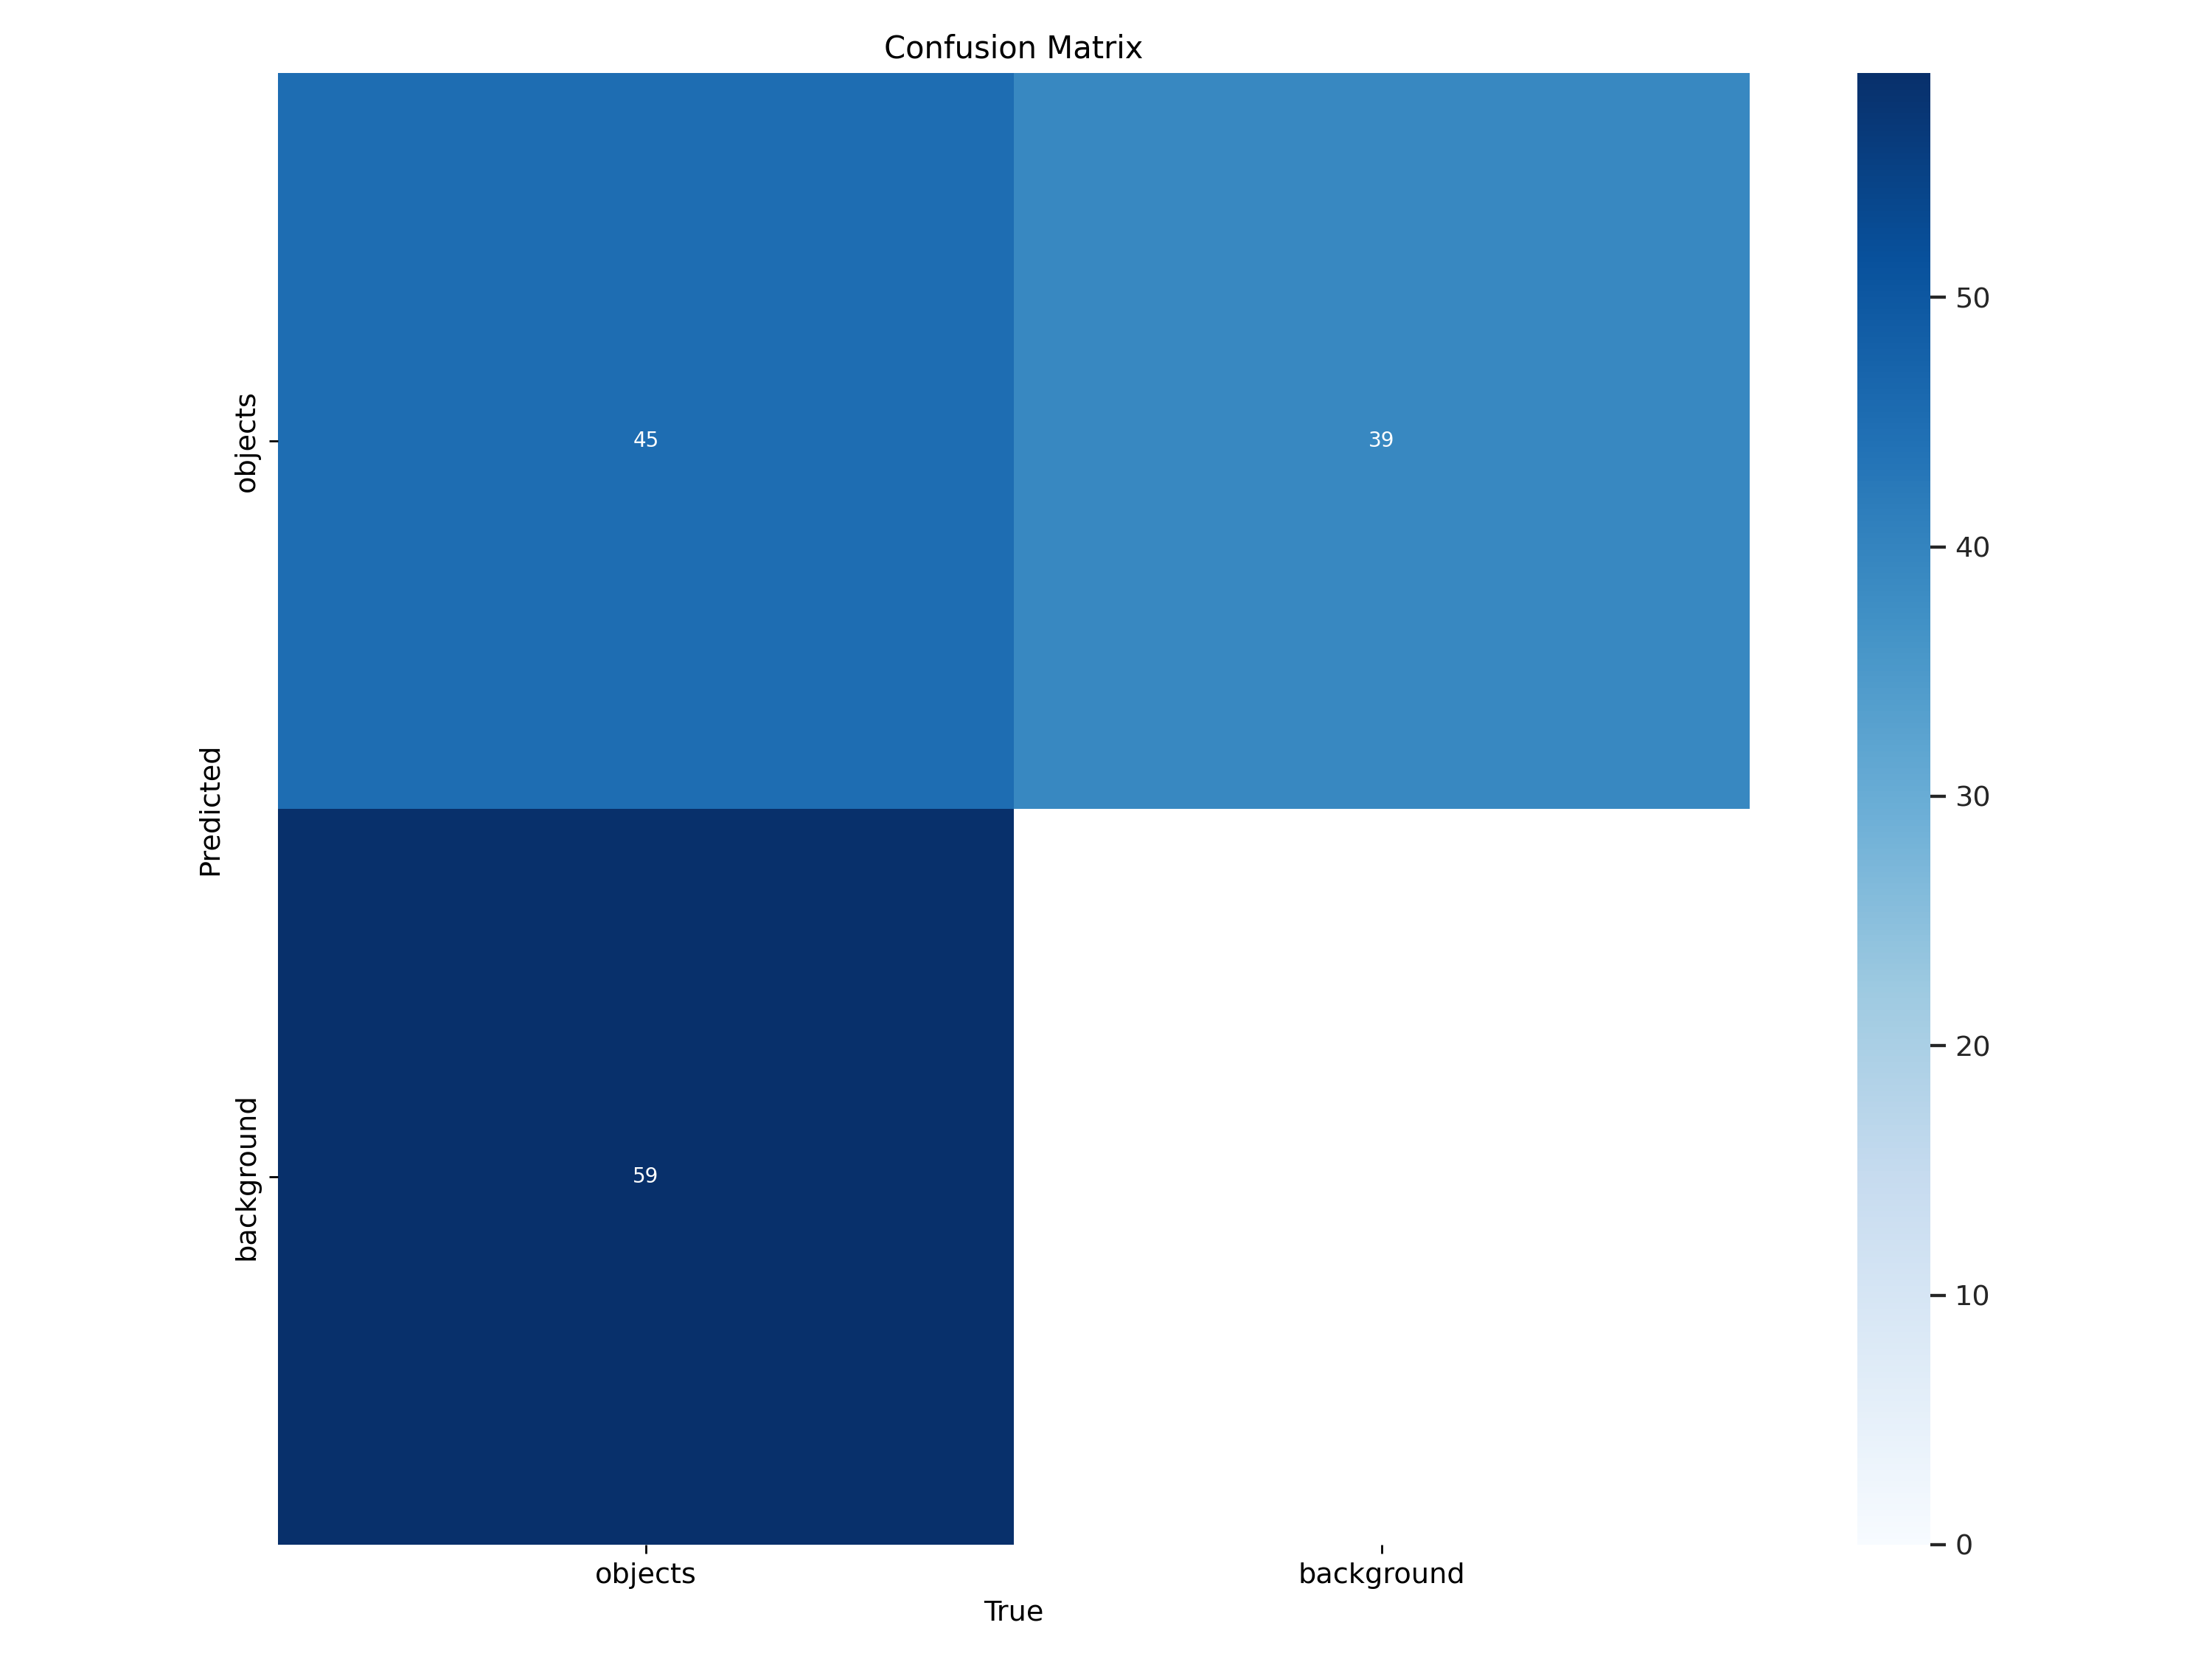

In [18]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

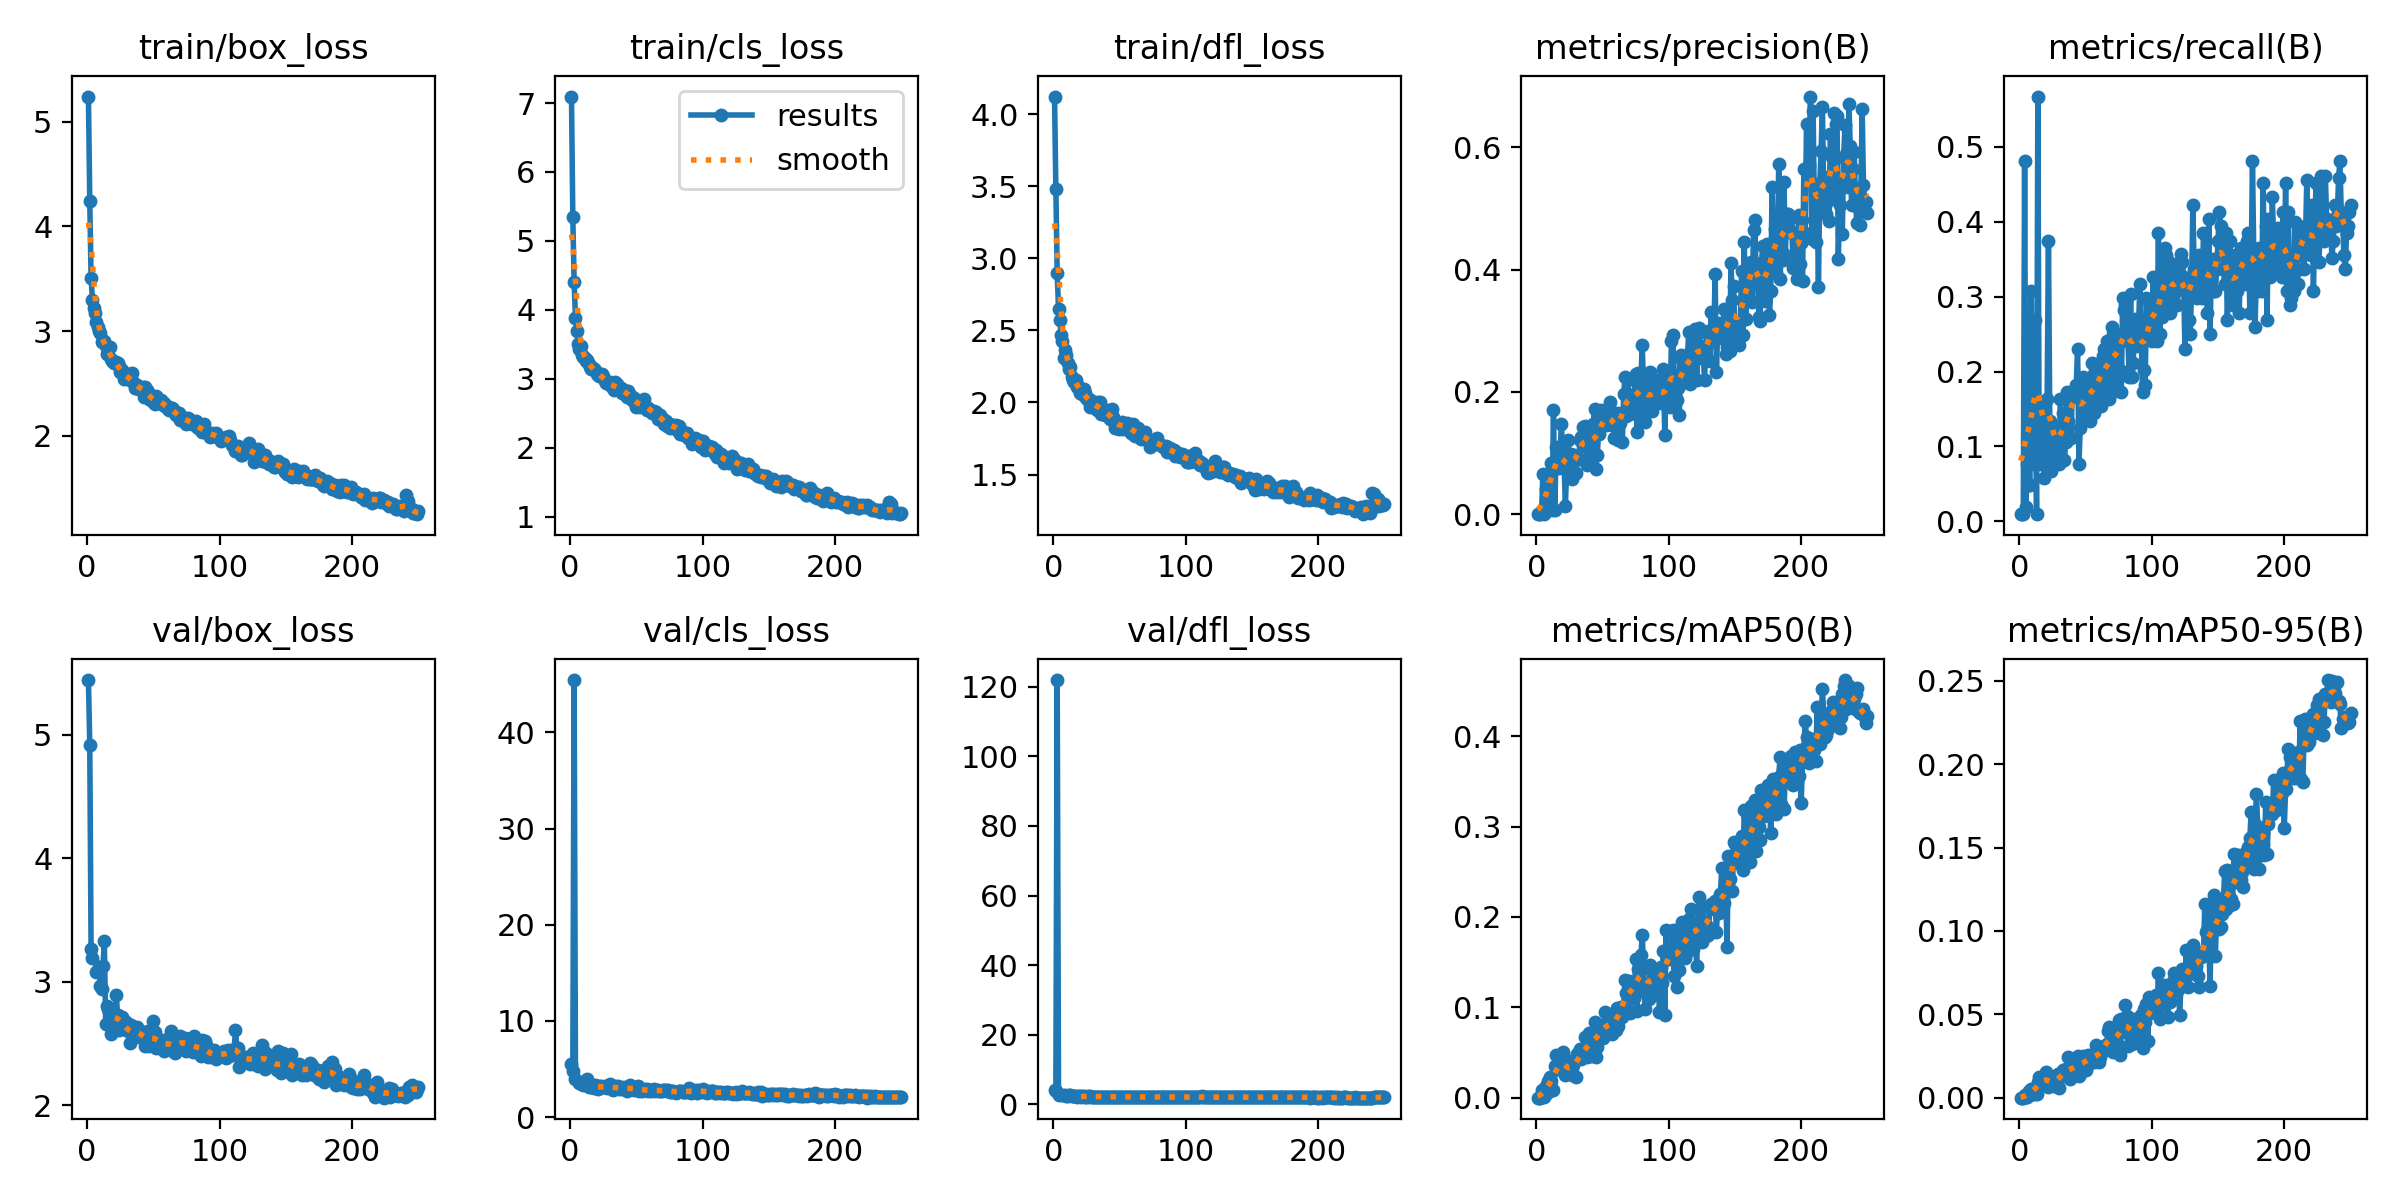

In [19]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [11]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['objects']

In [12]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [13]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.12560186344886098
mAP 50 0.23092470777432783
mAP 75 0.13631971841730156


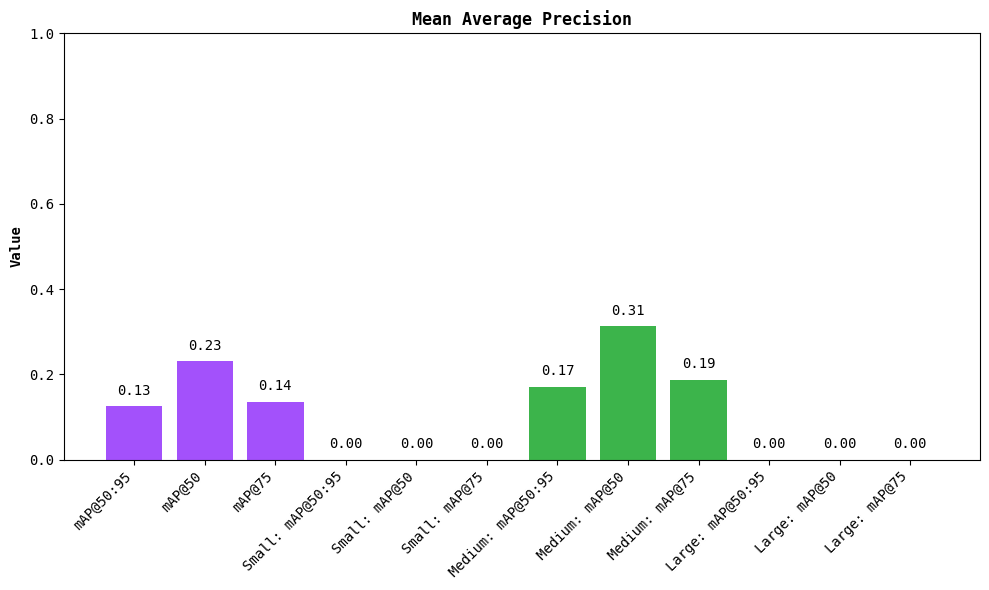

In [14]:
map.plot()

## Run inference with fine-tuned YOLOv12 model

In [15]:
import supervision as sv

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

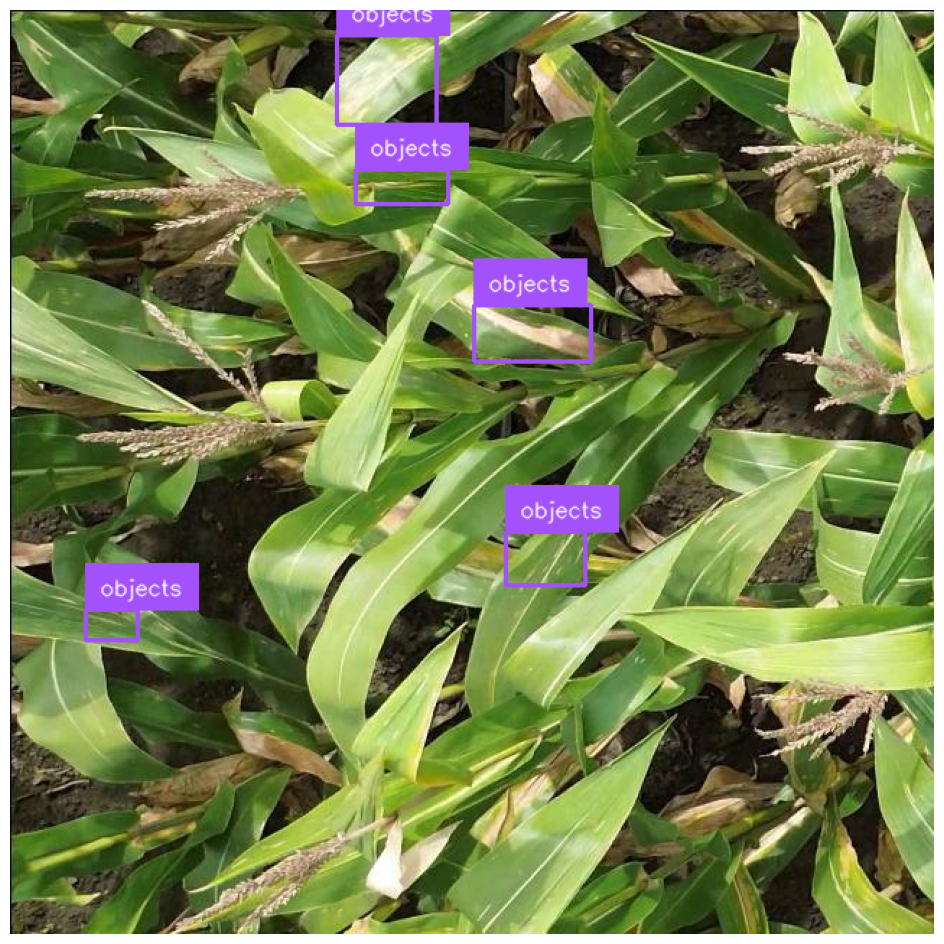

In [16]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)